<a href="https://colab.research.google.com/github/AbdoulKidakou/M1SLED/blob/main/Impl%C3%A9mentationdes_m%C3%A9thodes_de_traitement_de_donn%C3%A9e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **data handling techniques**


# **Main Goal:**

To equip users with practical tools and techniques for cleaning and preparing datasets, ensuring that the data used for analysis or modeling is reliable and representative of the underlying patterns. This notebook provides a foundation for robust data preprocessing and quality assurance.

In [15]:
#Traitement des données manquantes et aberrantes

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
# Exemple de jeu de données
np.random.seed(42)
data = {
    "A": [1, 2, np.nan, 4, 5, np.nan, 7, 8, 9, 10],
    "B": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "C": [np.nan, 10, 2, 3, 4, 5, 6, np.nan, 8, 5500]  # Contient une valeur aberrante
}
df = pd.DataFrame(data)

print("\n=== Jeu de données initial ===")
print(df)



=== Jeu de données initial ===
      A    B       C
0   1.0   10     NaN
1   2.0   20    10.0
2   NaN   30     2.0
3   4.0   40     3.0
4   5.0   50     4.0
5   NaN   60     5.0
6   7.0   70     6.0
7   8.0   80     NaN
8   9.0   90     8.0
9  10.0  100  5500.0


The purpose of Notebook 2 is to demonstrate data handling techniques, specifically focusing on addressing missing values and identifying/managing outliers in datasets. These tasks are critical in preparing data for machine learning models to ensure they perform accurately and robustly.

# **1.   Handling Missing Data:**

-  Understand different strategies to deal with missing values, such as:

            * Removing rows/columns with missing values.
            * Imputing missing values using statistical methods (mean, median, etc.).


- Learn how to make datasets complete for model training.

In [17]:
# 1. Gestion des données manquantes

## a. Suppression des lignes contenant des valeurs manquantes
print("\n=== Suppression des lignes contenant des valeurs manquantes ===")
df_dropna = df.dropna()
print(df_dropna)

## b. Imputation avec la moyenne
print("\n=== Imputation des valeurs manquantes avec la moyenne ===")
imputer_mean = SimpleImputer(strategy="mean")
df_mean = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)
print(df_mean)

## c. Imputation avec la médiane
print("\n=== Imputation des valeurs manquantes avec la médiane ===")
imputer_median = SimpleImputer(strategy="median")
df_median = pd.DataFrame(imputer_median.fit_transform(df), columns=df.columns)
print(df_median)



=== Suppression des lignes contenant des valeurs manquantes ===
      A    B       C
1   2.0   20    10.0
3   4.0   40     3.0
4   5.0   50     4.0
6   7.0   70     6.0
8   9.0   90     8.0
9  10.0  100  5500.0

=== Imputation des valeurs manquantes avec la moyenne ===
       A      B        C
0   1.00   10.0   692.25
1   2.00   20.0    10.00
2   5.75   30.0     2.00
3   4.00   40.0     3.00
4   5.00   50.0     4.00
5   5.75   60.0     5.00
6   7.00   70.0     6.00
7   8.00   80.0   692.25
8   9.00   90.0     8.00
9  10.00  100.0  5500.00

=== Imputation des valeurs manquantes avec la médiane ===
      A      B       C
0   1.0   10.0     5.5
1   2.0   20.0    10.0
2   6.0   30.0     2.0
3   4.0   40.0     3.0
4   5.0   50.0     4.0
5   6.0   60.0     5.0
6   7.0   70.0     6.0
7   8.0   80.0     5.5
8   9.0   90.0     8.0
9  10.0  100.0  5500.0


# 2.   Handling Outliers:

*   Identify outliers using statistical methods such as the Z-score.
*   Explore techniques to address outliers by either removing or capping them.
*   Visualize data distributions to better understand anomalies.   
    

In [18]:
# 2. Gestion des valeurs aberrantes

## a. Détection des valeurs aberrantes avec Z-Score
z_scores = stats.zscore(df["C"], nan_policy='omit')
print("\n=== Affichage des valeurs Z-Score de la colone C ===")
print(z_scores)


=== Affichage des valeurs Z-Score de la colone C ===
0         NaN
1   -0.375448
2   -0.379851
3   -0.379301
4   -0.378750
5   -0.378200
6   -0.377650
7         NaN
8   -0.376549
9    2.645749
Name: C, dtype: float64


In [23]:
print("\n=== Détection des valeurs aberrantes avec Z-Score ===")
df_ab = df[["C"]].copy()
df_ab["Z-Score"] = z_scores
def highlight_zscore(val):
  return 'background-color: yellow' if val == z_scores[9] else ''
styled_df_ab = df_ab.style.applymap(highlight_zscore, subset=['Z-Score'])
styled_df_ab
#aberrant_indices = np.where(np.abs(z_scores) > 2)  # Seuil: |Z| > 3
#print("Indices des valeurs aberrantes:", aberrant_indices)




=== Détection des valeurs aberrantes avec Z-Score ===


<ipython-input-23-8ec05987c175>:6: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df_ab = df_ab.style.applymap(highlight_zscore, subset=['Z-Score'])


,C,Z-Score
0,nan,nan
1,10.000000,-0.375448
2,2.000000,-0.379851
3,3.000000,-0.379301
4,4.000000,-0.378750
5,5.000000,-0.378200
6,6.000000,-0.377650
7,nan,nan
8,8.000000,-0.376549
9,5500.000000,2.645749



=== Suppression des valeurs aberrantes ===
     A   B     C
0  1.0  10   NaN
1  2.0  20  10.0
2  NaN  30   2.0
3  4.0  40   3.0
4  5.0  50   4.0
5  NaN  60   5.0
6  7.0  70   6.0
7  8.0  80   NaN
8  9.0  90   8.0

=== Visualisation des données ===


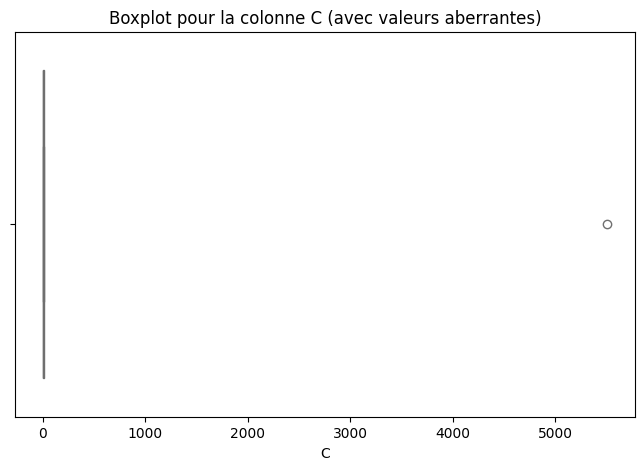


=== Résumé ===
1. Gestion des valeurs manquantes: Suppression et imputation (moyenne, médiane)
2. Détection et suppression des valeurs aberrantes (Z-Score)


In [20]:
## b. Suppression des valeurs aberrantes
print("\n=== Suppression des valeurs aberrantes ===")
df_no_outliers = df[(np.abs(z_scores) <= 2) | df["C"].isna()]
print(df_no_outliers)

## c. Visualisation des valeurs aberrantes
print("\n=== Visualisation des données ===")
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["C"], color="skyblue")
plt.title("Boxplot pour la colonne C (avec valeurs aberrantes)")
plt.show()

# Résumé des étapes appliquées
print("\n=== Résumé ===")
print("1. Gestion des valeurs manquantes: Suppression et imputation (moyenne, médiane)")
print("2. Détection et suppression des valeurs aberrantes (Z-Score)")
